In [2]:
import keras

Using TensorFlow backend.


In [9]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import PyUber


def main():
    spices = SQL_DataFrame(sql)
    spices.to_csv('spices.csv', index=False)
    
def convert_to_date(df, column1='MEAS_SET_DATA_COLLECT_DATE', column2='LOT_DATA_COLLECT_DATE', \
                    column3='CURRENT_MOVEIN_DATE', column4='END_DATE'):
    if column1 in df.columns:
        df[column1] = pd.to_datetime(df[column1])
    if column2 in df.columns:
        df[column2] = pd.to_datetime(df[column2])
    if column3 in df.columns:
        df[column3] = pd.to_datetime(df[column3])
    if column4 in df.columns:
        df[column4] = pd.to_datetime(df[column4])
    return df

def SQL_DataFrame(sql, source='D1D_PROD_XEUS'):
    conn = PyUber.connect(source)
    df = pd.read_sql(sql, conn)
    return df


sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              a1.entity = 'PAT414_PM3' 
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - 60 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'REMOVAL_RATE' 
"""

#if __name__ == "__main__": main()

In [10]:
%matplotlib inline

In [11]:
spices = SQL_DataFrame(sql)

In [12]:
spices.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT414_PM3,2.934113,2021-02-06 19:03:20,LAT.ETCHRATE.74.DER,2021-02-06 19:03:20,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.914236e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
1,PAT414_PM3,3.220172,2021-01-14 15:55:53,LAT.ETCHRATE.74.DER,2021-01-14 15:55:53,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.858255e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
2,PAT414_PM3,3.430002,2020-12-31 11:31:54,LAT.ETCHRATE.74.DER,2020-12-31 11:31:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.811926e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
3,PAT414_PM3,3.495544,2021-02-12 01:08:05,LAT.ETCHRATE.74.DER,2021-02-12 01:08:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.913404e+09,Y,Y,3.47,1.36,5.58,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
4,PAT414_PM3,3.686836,2021-02-06 18:39:23,LAT.ETCHRATE.74.DER,2021-02-06 18:39:23,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.896312e+09,Y,Y,3.47,1.36,5.58,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT


In [13]:
er_spices = spices[spices['PARAMETER_CLASS']=='REMOVAL_RATE']

In [14]:
er_spices = convert_to_date(er_spices)

In [15]:
er_spices.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT414_PM3,2.934113,2021-02-06 19:03:20,LAT.ETCHRATE.74.DER,2021-02-06 19:03:20,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.914236e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
1,PAT414_PM3,3.220172,2021-01-14 15:55:53,LAT.ETCHRATE.74.DER,2021-01-14 15:55:53,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.858255e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
2,PAT414_PM3,3.430002,2020-12-31 11:31:54,LAT.ETCHRATE.74.DER,2020-12-31 11:31:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.811926e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
3,PAT414_PM3,3.495544,2021-02-12 01:08:05,LAT.ETCHRATE.74.DER,2021-02-12 01:08:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.913404e+09,Y,Y,3.47,1.36,5.58,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
4,PAT414_PM3,3.686836,2021-02-06 18:39:23,LAT.ETCHRATE.74.DER,2021-02-06 18:39:23,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.896312e+09,Y,Y,3.47,1.36,5.58,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT


In [16]:
#plt.plot(er_spices['LOT_DATA_COLLECT_DATE'], er_spices['CHART_VALUE'])

In [17]:
ers = er_spices
oxer = ers[((ers['TEST_NAME']=='4LATOXERPS')&(ers['CHART_TYPE']=='X-BAR'))]

In [18]:
oxer

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
37,PAT414_PM3,356.798345,2021-02-12 01:58:54,LAT.ETCHRATE.74.DER,2021-02-12 01:58:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.929730e+09,Y,Y,357.0,346.5,367.5,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
38,PAT414_PM3,356.815690,2021-01-14 10:31:47,LAT.ETCHRATE.74.DER,2021-01-14 10:31:47,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.893099e+09,Y,Y,357.0,346.5,367.5,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
39,PAT414_PM3,357.976207,2020-12-31 07:15:19,LAT.ETCHRATE.74.DER,2020-12-31 07:15:19,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.840890e+09,Y,Y,357.0,346.5,367.5,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
40,PAT414_PM3,357.976207,2020-12-31 07:15:19,LAT.ETCHRATE.74.DER,2020-12-31 07:15:19,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.840890e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
41,PAT414_PM3,358.456931,2021-02-06 19:35:05,LAT.ETCHRATE.74.DER,2021-02-06 19:35:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.935552e+09,Y,Y,357.0,346.5,367.5,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
42,PAT414_PM3,359.083897,2021-01-28 12:29:12,LAT.ETCHRATE.74.DER,2021-01-28 12:29:12,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.924651e+09,Y,Y,357.0,346.5,367.5,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT


C:\Users\narju\.conda\envs\IntelLearn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


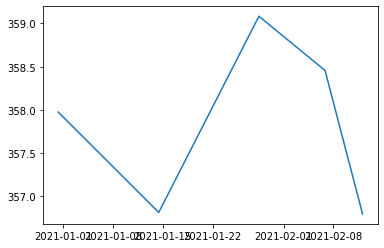

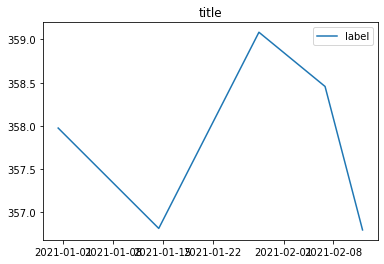

In [19]:
oxer.sort_values(by='LOT_DATA_COLLECT_DATE', inplace=True)
plt.plot(oxer['LOT_DATA_COLLECT_DATE'], oxer['CHART_VALUE'])
fig = plt.figure()
x = oxer['LOT_DATA_COLLECT_DATE']
y = oxer['CHART_VALUE']
ax = plt.subplot(111)
ax.plot(x, y, label = 'label')
plt.title('title')
ax.legend()
fig.savefig('figs/fig1.png')

In [20]:
fig

In [24]:
f_png='figs/fig1.png'
plt.savefig(f_png)

<Figure size 432x288 with 0 Axes>

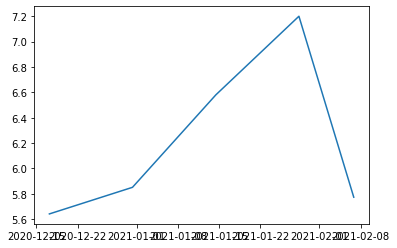

In [12]:
oxs = ers[((ers['TEST_NAME']=='4LATOXERPS')&(ers['CHART_TYPE']=='SIGMA'))].sort_values(by='LOT_DATA_COLLECT_DATE')
plt.plot(oxs['LOT_DATA_COLLECT_DATE'], oxs['CHART_VALUE'])

'C:\\Users\\narju\\OneDrive - Intel Corporation\\Documents\\Training\\python\\intel\\SPC_SNOOP'

In [70]:
hner = ers[ers['TEST_NAME']=='4LATHVBPNT2ERPS']

In [71]:
hner

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
12,PAT414_PM3,5.017455,2020-10-11 08:12:29,LAT.ETCHRATE.74.DER,2020-10-11 08:12:29,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.666546e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
13,PAT414_PM3,5.264157,2020-10-04 05:34:21,LAT.ETCHRATE.74.DER,2020-10-04 05:34:21,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.660468e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
15,PAT414_PM3,5.560891,2020-10-18 10:18:15,LAT.ETCHRATE.74.DER,2020-10-18 10:18:15,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.668978e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
18,PAT414_PM3,6.440795,2020-11-15 18:01:05,LAT.ETCHRATE.74.DER,2020-11-15 18:01:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.741665e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
19,PAT414_PM3,6.513748,2020-11-22 19:48:23,LAT.ETCHRATE.74.DER,2020-11-22 19:48:23,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.751427e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
21,PAT414_PM3,6.965469,2020-11-08 15:28:12,LAT.ETCHRATE.74.DER,2020-11-08 15:28:12,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.720603e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
22,PAT414_PM3,7.353378,2020-11-01 14:28:28,LAT.ETCHRATE.74.DER,2020-11-01 14:28:28,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.707507e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
24,PAT414_PM3,7.875141,2020-10-25 12:50:54,LAT.ETCHRATE.74.DER,2020-10-25 12:50:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.665662e+09,Y,Y,6.37,3.85,8.88,SIGMA,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
32,PAT414_PM3,324.086448,2020-10-11 08:12:29,LAT.ETCHRATE.74.DER,2020-10-11 08:12:29,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.666546e+09,Y,Y,328.60,321.50,335.70,X-BAR,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT
33,PAT414_PM3,324.872517,2020-11-15 18:01:05,LAT.ETCHRATE.74.DER,2020-11-15 18:01:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.741665e+09,Y,Y,328.60,321.50,335.70,X-BAR,ALL MEASUREMENTS,4LATHVBPNT2ERPS,None,LAT


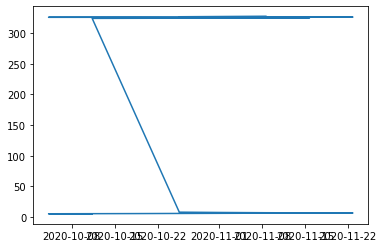

In [72]:
plt.plot(hner['LOT_DATA_COLLECT_DATE'], hner['CHART_VALUE'])

In [73]:
ers

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT414_PM3,2.563153,2020-10-01 12:32:08,LAT.ETCHRATE.74.DER,2020-10-01 12:32:08,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.663476e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
1,PAT414_PM3,2.771961,2020-10-15 16:40:26,LAT.ETCHRATE.74.DER,2020-10-15 16:40:26,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683143e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
2,PAT414_PM3,3.204048,2020-11-04 22:35:32,LAT.ETCHRATE.74.DER,2020-11-04 22:35:32,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.711009e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
3,PAT414_PM3,3.205699,2020-10-20 15:22:02,LAT.ETCHRATE.74.DER,2020-10-20 15:22:02,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683577e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
4,PAT414_PM3,3.264454,2020-11-19 05:02:54,LAT.ETCHRATE.74.DER,2020-11-19 05:02:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.737661e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
5,PAT414_PM3,3.555473,2020-11-04 22:34:52,LAT.ETCHRATE.74.DER,2020-11-04 22:34:52,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.707607e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
6,PAT414_PM3,3.641333,2020-10-15 16:21:15,LAT.ETCHRATE.74.DER,2020-10-15 16:21:15,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683155e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
7,PAT414_PM3,3.692149,2020-11-19 01:34:51,LAT.ETCHRATE.74.DER,2020-11-19 01:34:51,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.741703e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
8,PAT414_PM3,4.026123,2020-10-01 12:29:15,LAT.ETCHRATE.74.DER,2020-10-01 12:29:15,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.647404e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
9,PAT414_PM3,4.080173,2020-10-20 22:02:21,LAT.ETCHRATE.74.DER,2020-10-20 22:02:21,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.685925e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT


In [74]:
spices

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT414_PM3,2.563153,2020-10-01 12:32:08,LAT.ETCHRATE.74.DER,2020-10-01 12:32:08,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.663476e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
1,PAT414_PM3,2.771961,2020-10-15 16:40:26,LAT.ETCHRATE.74.DER,2020-10-15 16:40:26,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683143e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
2,PAT414_PM3,3.204048,2020-11-04 22:35:32,LAT.ETCHRATE.74.DER,2020-11-04 22:35:32,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.711009e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
3,PAT414_PM3,3.205699,2020-10-20 15:22:02,LAT.ETCHRATE.74.DER,2020-10-20 15:22:02,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683577e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
4,PAT414_PM3,3.264454,2020-11-19 05:02:54,LAT.ETCHRATE.74.DER,2020-11-19 05:02:54,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.737661e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
5,PAT414_PM3,3.555473,2020-11-04 22:34:52,LAT.ETCHRATE.74.DER,2020-11-04 22:34:52,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.707607e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
6,PAT414_PM3,3.641333,2020-10-15 16:21:15,LAT.ETCHRATE.74.DER,2020-10-15 16:21:15,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.683155e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT
7,PAT414_PM3,3.692149,2020-11-19 01:34:51,LAT.ETCHRATE.74.DER,2020-11-19 01:34:51,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.741703e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
8,PAT414_PM3,4.026123,2020-10-01 12:29:15,LAT.ETCHRATE.74.DER,2020-10-01 12:29:15,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.647404e+09,Y,Y,3.40,1.95,5.05,SIGMA,ALL MEASUREMENTS,4LATNTERPS,None,LAT
9,PAT414_PM3,4.080173,2020-10-20 22:02:21,LAT.ETCHRATE.74.DER,2020-10-20 22:02:21,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.685925e+09,Y,Y,3.80,1.80,5.90,SIGMA,ALL MEASUREMENTS,4LATPLYERPS,None,LAT


In [97]:
ox=oxer[['LOT_DATA_COLLECT_DATE','CHART_VALUE']]

In [102]:
ox=ox.rename(columns={'CHART_VALUE': 'y', 'LOT_DATA_COLLECT_DATE': 'date'})

In [136]:
xmin=ox['date'].min()
xmax=ox['date'].max()
ox.date

44   2020-10-01 12:14:32
45   2020-10-15 16:38:09
41   2020-10-15 17:38:41
40   2020-10-20 22:08:41
43   2020-11-04 23:43:29
42   2020-11-19 01:51:18
Name: date, dtype: datetime64[ns]

In [137]:
f=interpolate.interp1d(ox['date'], ox['y'])

In [144]:
datep = pd.date_range(xmin, xmax, freq='D')

In [146]:
datep

DatetimeIndex(['2020-10-01 12:14:32', '2020-10-02 12:14:32',
               '2020-10-03 12:14:32', '2020-10-04 12:14:32',
               '2020-10-05 12:14:32', '2020-10-06 12:14:32',
               '2020-10-07 12:14:32', '2020-10-08 12:14:32',
               '2020-10-09 12:14:32', '2020-10-10 12:14:32',
               '2020-10-11 12:14:32', '2020-10-12 12:14:32',
               '2020-10-13 12:14:32', '2020-10-14 12:14:32',
               '2020-10-15 12:14:32', '2020-10-16 12:14:32',
               '2020-10-17 12:14:32', '2020-10-18 12:14:32',
               '2020-10-19 12:14:32', '2020-10-20 12:14:32',
               '2020-10-21 12:14:32', '2020-10-22 12:14:32',
               '2020-10-23 12:14:32', '2020-10-24 12:14:32',
               '2020-10-25 12:14:32', '2020-10-26 12:14:32',
               '2020-10-27 12:14:32', '2020-10-28 12:14:32',
               '2020-10-29 12:14:32', '2020-10-30 12:14:32',
               '2020-10-31 12:14:32', '2020-11-01 12:14:32',
               '2020-11-

In [120]:
datep.values

numpy.datetime64('2020-11-19T01:51:18.000000000')

In [126]:
ox.date

44   2020-10-01 12:14:32
45   2020-10-15 16:38:09
41   2020-10-15 17:38:41
40   2020-10-20 22:08:41
43   2020-11-04 23:43:29
42   2020-11-19 01:51:18
Name: date, dtype: datetime64[ns]

In [127]:
datep

DatetimeIndex(['2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-19 01:51:18', '2020-11-19 01:51:18',
               '2020-11-

In [7]:
oxer

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
40,PAT414_PM3,356.782759,2020-10-20 22:08:41,LAT.ETCHRATE.74.DER,2020-10-20 22:08:41,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.692700e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
41,PAT414_PM3,357.851759,2020-10-15 17:38:41,LAT.ETCHRATE.74.DER,2020-10-15 17:38:41,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.676744e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
42,PAT414_PM3,357.930828,2020-11-19 01:51:18,LAT.ETCHRATE.74.DER,2020-11-19 01:51:18,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.749308e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
43,PAT414_PM3,358.816379,2020-11-04 23:43:29,LAT.ETCHRATE.74.DER,2020-11-04 23:43:29,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.720307e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
44,PAT414_PM3,359.220414,2020-10-15 16:38:09,LAT.ETCHRATE.74.DER,2020-10-15 16:38:09,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.676744e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT
45,PAT414_PM3,359.558724,2020-12-03 03:13:05,LAT.ETCHRATE.74.DER,2020-12-03 03:13:05,TOOL MONITOR,REMOVAL_RATE,LAT.ETCHRATE_PST.74.MON,2.781491e+09,Y,Y,358.5,348.0,369.0,X-BAR,ALL MEASUREMENTS,4LATOXERPS,None,LAT


In [151]:
a=oxer[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
a=a.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'y'})

In [152]:
a=a.reset_index()[['t','y']]

In [153]:
a

,t,y
0,2020-10-20 22:08:41,356.782759
1,2020-10-15 17:38:41,357.851759
2,2020-11-19 01:51:18,357.930828
3,2020-11-04 23:43:29,358.816379
4,2020-10-15 16:38:09,359.220414
5,2020-12-03 03:13:05,359.558724


In [147]:
#a.set_index('t')

,y
t,
2020-10-20 22:08:41,356.782759
2020-10-15 17:38:41,357.851759
2020-11-19 01:51:18,357.930828
2020-11-04 23:43:29,358.816379
2020-10-15 16:38:09,359.220414
2020-12-03 03:13:05,359.558724


In [154]:
a.index = pd.to_datetime(a.t)

In [155]:
a.drop(['t'], axis=1, inplace=True)
a

,y
t,
2020-10-20 22:08:41,356.782759
2020-10-15 17:38:41,357.851759
2020-11-19 01:51:18,357.930828
2020-11-04 23:43:29,358.816379
2020-10-15 16:38:09,359.220414
2020-12-03 03:13:05,359.558724


In [156]:
a=oxer[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
a=a.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'y'})
a=a.reset_index()[['t','y']]
a.index = pd.to_datetime(a.t)
a.drop(['t'], axis=1, inplace=True)
a

,y
t,
2020-10-20 22:08:41,356.782759
2020-10-15 17:38:41,357.851759
2020-11-19 01:51:18,357.930828
2020-11-04 23:43:29,358.816379
2020-10-15 16:38:09,359.220414
2020-12-03 03:13:05,359.558724


In [161]:
a=a.sort_index()

In [164]:
a

,y
t,
2020-10-15 16:38:09,359.220414
2020-10-15 17:38:41,357.851759
2020-10-20 22:08:41,356.782759
2020-11-04 23:43:29,358.816379
2020-11-19 01:51:18,357.930828
2020-12-03 03:13:05,359.558724


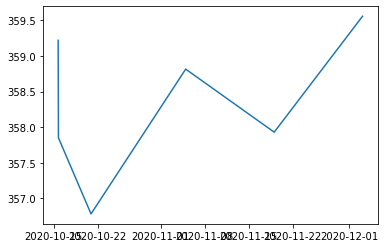

In [163]:
plt.plot(a)

In [19]:
type(a['LOT_DATA_COLLECT_DATE'][40])
a.

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
#a.interploate(method='time', axis=1, )
a.set_index('LOT_DATA_COLLECT_DATE')

,CHART_VALUE
LOT_DATA_COLLECT_DATE,
2020-10-20 22:08:41,356.782759
2020-10-15 17:38:41,357.851759
2020-11-19 01:51:18,357.930828
2020-11-04 23:43:29,358.816379
2020-10-15 16:38:09,359.220414
2020-12-03 03:13:05,359.558724


In [111]:
a

,t,y
t,,
2020-10-20 22:08:41,2020-10-20 22:08:41,356.782759
2020-10-15 17:38:41,2020-10-15 17:38:41,357.851759
2020-11-19 01:51:18,2020-11-19 01:51:18,357.930828
2020-11-04 23:43:29,2020-11-04 23:43:29,358.816379
2020-10-15 16:38:09,2020-10-15 16:38:09,359.220414
2020-12-03 03:13:05,2020-12-03 03:13:05,359.558724


In [165]:
b=a.resample('1D').mean()
#a.drop

In [168]:
b.head()

,y
t,
2020-10-15,358.536086
2020-10-16,NaN
2020-10-17,NaN
2020-10-18,NaN
2020-10-19,NaN


In [170]:
b=b.interpolate(method='linear')

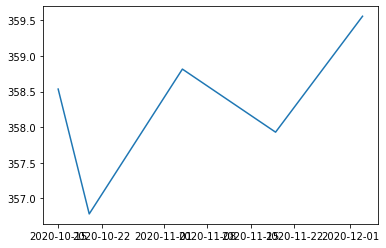

In [171]:
plt.plot(b)

In [83]:
type(a)

str

In [2]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import PyUber


def main():
    spices = SQL_DataFrame(sql)
    spices.to_csv('spices.csv', index=False)
    
def convert_to_date(df, column1='MEAS_SET_DATA_COLLECT_DATE', column2='LOT_DATA_COLLECT_DATE', \
                    column3='CURRENT_MOVEIN_DATE', column4='END_DATE'):
    if column1 in df.columns:
        df[column1] = pd.to_datetime(df[column1])
    if column2 in df.columns:
        df[column2] = pd.to_datetime(df[column2])
    if column3 in df.columns:
        df[column3] = pd.to_datetime(df[column3])
    if column4 in df.columns:
        df[column4] = pd.to_datetime(df[column4])
    return df

def SQL_DataFrame(sql, source='D1D_PROD_XEUS'):
    conn = PyUber.connect(source)
    df = pd.read_sql(sql, conn)
    return df


sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              a1.entity = 'PAT414_PM3' 
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - 60 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'DEFECT_PARTICLE' 
"""



#if __name__ == "__main__": main()

In [29]:
ss = SQL_DataFrame(sql)

In [31]:
st = ss[ss['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

In [32]:
st.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
6,PAT414_PM3,0.0,2020-12-25 16:53:07,LAT.DSA_PST.74.DER,2020-12-25 16:53:07,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.877669e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
10,PAT414_PM3,0.0,2020-12-25 16:53:10,LAT.DSA_PST.74.DER,2020-12-25 16:53:10,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.877669e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
23,PAT414_PM3,0.0,2020-12-28 19:20:05,LAT.DSA_PST.74.DER,2020-12-28 19:20:05,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
27,PAT414_PM3,0.0,2020-12-28 19:20:09,LAT.DSA_PST.74.DER,2020-12-28 19:20:09,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
31,PAT414_PM3,0.0,2020-12-28 01:39:16,LAT.DSA_PST.74.DER,2020-12-28 01:39:16,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.882809e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT


In [51]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [39]:
st=st.sort_values(by='LOT_DATA_COLLECT_DATE')

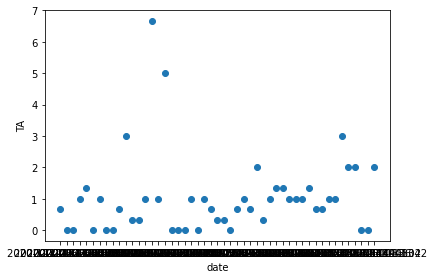

In [61]:
x = st['LOT_DATA_COLLECT_DATE']
y = st['CHART_VALUE']
#plt.plot(x,y,'o')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax = plt.subplot(111)
ax.plot(x, y, 'o')
ax.set_xlabel('date')
ax.set_ylabel('TA')
#plt.title('title')
#ax.legend()
fig.savefig('figs/fig1.png')

In [3]:
ss = SQL_DataFrame(sql)
ss.columns

Index(['ENTITY', 'CHART_VALUE', 'LOT_DATA_COLLECT_DATE',
       'MEASUREMENT_SET_NAME', 'MEAS_SET_DATA_COLLECT_DATE', 'MONITOR_TYPE',
       'PARAMETER_CLASS', 'MONITOR_SET_NAME', 'LOTOPERKEY', 'INCONTROL_FLAG',
       'CHART_PT_STANDARD_FLAG', 'CENTERLINE', 'LO_CONTROL_LMT',
       'UP_CONTROL_LMT', 'CHART_TYPE', 'SPC_CHART_SUBSET', 'TEST_NAME',
       'PARAMETER_HEADER', 'MODULE'],
      dtype='object')

In [4]:
ss.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT414_PM3,0.0,2020-12-28 19:19:59,LAT.DSA_PST.74.DER,2020-12-28 19:19:59,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,0.1,0.0,1.0,X-BAR,PARTICLE_SIZE=ADDED_CLUSTER_AREA,4LATNTSSPS,PARTICLE_SIZE,LAT
1,PAT414_PM3,0.0,2020-12-28 19:19:59,LAT.DSA_PST.74.DER,2020-12-28 19:19:59,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,0.0,0.0,1.1,X-BAR,PARTICLE_SIZE=ADDED_CLUSTERS,4LATNTSSPS,PARTICLE_SIZE,LAT
2,PAT414_PM3,0.0,2020-12-28 19:19:59,LAT.DSA_PST.74.DER,2020-12-28 19:19:59,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,0.4,0.0,1.3,X-BAR,PARTICLE_SIZE=LARGE_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
3,PAT414_PM3,0.0,2020-12-28 19:20:05,LAT.DSA_PST.74.DER,2020-12-28 19:20:05,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,0.1,0.0,1.0,X-BAR,PARTICLE_SIZE=ADDED_CLUSTER_AREA,4LATNTSSPS,PARTICLE_SIZE,LAT
4,PAT414_PM3,0.0,2020-12-28 19:20:05,LAT.DSA_PST.74.DER,2020-12-28 19:20:05,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.879050e+09,Y,Y,0.0,0.0,1.1,X-BAR,PARTICLE_SIZE=ADDED_CLUSTERS,4LATNTSSPS,PARTICLE_SIZE,LAT


In [11]:
sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              (a1.entity LIKE 'LAT%' )
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - 60 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'DEFECT_PARTICLE' 
"""
ss = SQL_DataFrame(sql)

In [12]:
ss.ENTITY.unique()

array(['LAT426_PM3', 'LAT426_PM4', 'LAT426_PM1', 'LAT404_PM1',
       'LAT402_PM1', 'LAT404_PM3', 'LAT402_PM2', 'LAT404_PM2',
       'LAT402_PM4', 'LAT406_PM3', 'LAT424_PM1', 'LAT418_PM4',
       'LAT418_PM3', 'LAT424_PM4', 'LAT428_PM4', 'LAT404_PM4',
       'LAT402_PM3', 'LAT410_PM2', 'LAT424_PM3', 'LAT418_PM2',
       'LAT428_PM3', 'LAT410_PM4', 'LAT406_PM2', 'LAT428_PM2',
       'LAT406_PM1', 'LAT406_PM4', 'LAT416_PM1', 'LAT410_PM3',
       'LAT426_PM2', 'LAT428_PM1', 'LAT416_PM4', 'LAT416_PM3',
       'LAT416_PM2', 'LAT424_PM2', 'LAT410_PM1', 'LAT418_PM1'],
      dtype=object)

In [13]:
len(ss)

9109

NameError: name 'np' is not defined